In [ ]:
import os
import pandas as pd

In [ ]:
waveform_dir = "Waveform_CSVs"
devices  = ["Substation feed to Non-UPS Load from Utility A","Substation feed to UPS1-A","Substation feed to UPS1-A","Substation Feed to UPS1-B","UPS1-A Output","UPS1-B Output","Utility B"]

In [ ]:
directory_summary_dict = {"Non UPS load A" : "Substation feed to Non-UPS Load from Utility A",
                          "Non UPS load B" : "Substation feed to Non-UPS Load from Utility B",
                          "UPS A input": "Substation feed to UPS1-A",
                          "UPS B input": "Substation Feed to UPS1-B",
                          "UPS A output": "UPS1-A Output",
                          "UPS B Output" : "UPS1-B Output",
                          "Utility B": "Utility B"}

In [ ]:
waveform_summary = "final_waveform_summary.csv"
summary_table_df = pd.read_csv(waveform_summary)
summary_table_df.columns

Index(['device', 'file', 'event_id', 'trigger_timestamp', 'date', 'hour',
       'minute', 'second', 'millisec', 'variable', 'class', 'sub_class',
       'severity'],
      dtype='object')

In [ ]:
summary_table_df.shape

(3179, 13)

In [ ]:
null_summary_df = summary_table_df[(summary_table_df['class'].isnull())]
null_summary_df.shape

(10, 13)

In [ ]:
path = os.path.join(waveform_dir, directory_summary_dict[null_summary_df.device.iloc[2]], null_summary_df.file.iloc[2] + ".csv")
temp_df = pd.read_csv(path)
temp_df.columns

Index(['time', 'VBG', 'VAG', 'VNG', 'VCG', 'VAGAUX', 'VRG', 'VCGAUX', 'VBGAUX',
       'RESERVEDB', 'RESERVEDC', 'IG', 'RESERVEDA', 'IC', 'IN', 'IA', 'IB',
       'DI1:Input One', 'DI2:Input Two', 'DI3:Input Three', 'DI4:Input Four',
       'DI5:Input Five', 'DI6:Input Six', 'DI7:Input Seven',
       'DI8:Input Eight'],
      dtype='object')

In [ ]:
count = temp_df[(temp_df['time'] > 0.4) & (temp_df['time'] < 0.6)].shape[0]
print(count)

6144


In [ ]:
path = os.path.join(waveform_dir, directory_summary_dict[summary_table_df.device.iloc[1]], summary_table_df.file.iloc[1] + ".csv")
sample_df = pd.read_csv(path)
sample_df.columns

Index(['time', 'VBG', 'VAG', 'VNG', 'VCG', 'VAGAUX', 'VRG', 'VCGAUX', 'VBGAUX',
       'RESERVEDB', 'RESERVEDC', 'IG', 'RESERVEDA', 'IC', 'IN', 'IA', 'IB',
       'DI1:Input One', 'DI2:Input Two', 'DI3:Input Three', 'DI4:Input Four',
       'DI5:Input Five', 'DI6:Input Six', 'DI7:Input Seven',
       'DI8:Input Eight'],
      dtype='object')

In [ ]:
summary_table_df[['file','variable', 'class']].head

<bound method NDFrame.head of             file variable                  class
0     wv00000001      Vcg  Sub-Cycle Disturbance
1     wv00000002      Vcg  Sub-Cycle Disturbance
2     wv00000003      Vcg  Sub-Cycle Disturbance
3     wv00000004      Vag  Sub-Cycle Disturbance
4     wv00000004      Vbg  Sub-Cycle Disturbance
...          ...      ...                    ...
3174  wv0000078f   Vllavg          Out of Limits
3175  wv00000790   Vllavg          Out of Limits
3176  wv00000790      Vcn                    Sag
3177  wv00000791   Vllavg          Out of Limits
3178  wv00000791      Van                    Sag

[3169 rows x 3 columns]>

In [ ]:
v = summary_table_df.iloc[1]['variable']
v=v.upper()

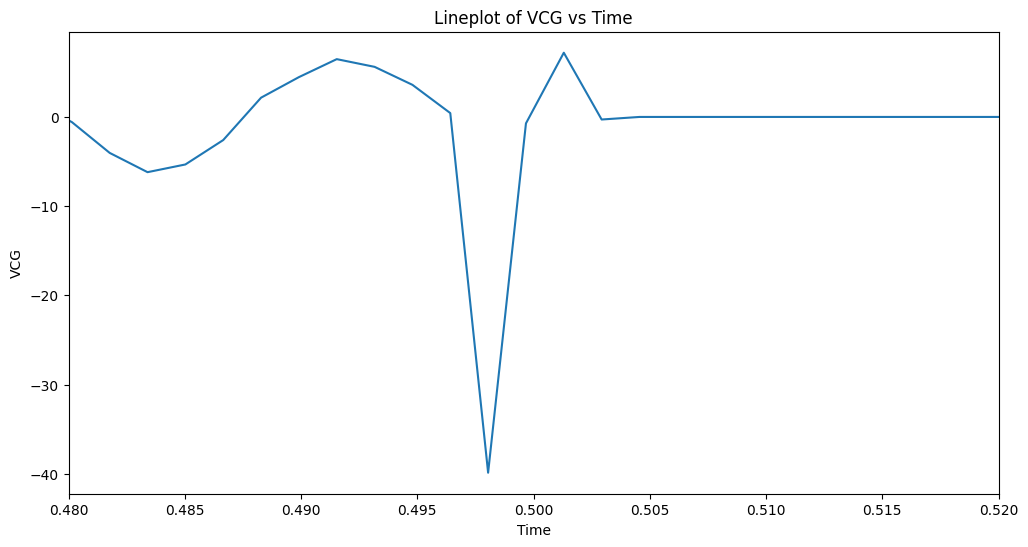

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Increase the size of the plot
sns.lineplot(x=sample_df['time'][::50], y=sample_df[v][::50])
plt.xlim(0.48, 0.52)  # Clip the x-axis
plt.xlabel('Time')
plt.ylabel(f'{v}')
plt.title(f'Lineplot of {v} vs Time')
plt.show()

In [ ]:
sample_df.shape

(30720, 25)

In [ ]:
temp_df.shape

(30720, 25)

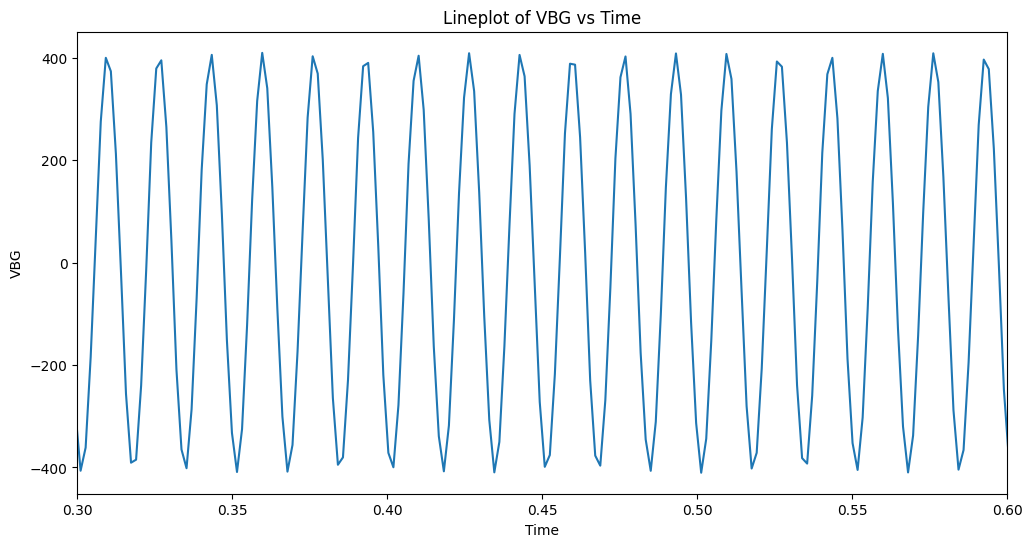

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Increase the size of the plot
sns.lineplot(x=temp_df['time'][::50], y=temp_df['VAG'][::50])
plt.xlim(0.3, 0.6)  # Clip the x-axis
plt.xlabel('Time')
plt.ylabel('VBG')
plt.title('Lineplot of VBG vs Time')
plt.show()

In [ ]:
summary_table_df = summary_table_df.dropna(subset=['class'])
summary_table_df.shape

(3169, 13)

In [ ]:
summary_table_df.head()

,device,file,event_id,trigger_timestamp,date,hour,minute,second,millisec,variable,class,sub_class,severity
0,Non UPS load A,wv00000001,0,2010-11-18 18:47:30.573,2010-11-18,18.0,47.0,30.0,573.0,Vcg,Sub-Cycle Disturbance,NaN,NaN
1,Non UPS load A,wv00000002,1,2010-11-18 22:33:44.366,2010-11-18,22.0,33.0,44.0,366.0,Vcg,Sub-Cycle Disturbance,NaN,NaN
2,Non UPS load A,wv00000003,2,2010-11-18 23:10:25.975,2010-11-18,23.0,10.0,25.0,975.0,Vcg,Sub-Cycle Disturbance,NaN,NaN
3,Non UPS load A,wv00000004,3,2011-03-08 15:49:26.046,2011-03-08,15.0,49.0,26.0,46.0,Vag,Sub-Cycle Disturbance,NaN,NaN
4,Non UPS load A,wv00000004,4,2011-03-08 15:49:26.046,2011-03-08,15.0,49.0,26.0,46.0,Vbg,Sub-Cycle Disturbance,NaN,NaN


In [ ]:
null_variable_rows = summary_table_df[summary_table_df['class'].isnull()]
print(null_variable_rows)

Empty DataFrame
Columns: [device, file, event_id, trigger_timestamp, date, hour, minute, second, millisec, variable, class, sub_class, severity]
Index: []


In [ ]:
len(summary_table_df)

3169

In [ ]:
class_dict = {"Sub-Cycle Disturbance": 1, "Sag": 2, "Swell": 3, "Fast Transient": 4, "Out of Limits": 5}

In [ ]:
result_list = []

for x in range(1):
    _dict = {
        "device": summary_table_df.iloc[x]['device'],
        "file": summary_table_df.iloc[x]['file'],
        "variable": summary_table_df.iloc[x]['variable'].upper(),
        "class": summary_table_df.iloc[x]['class']
    }
    path = os.path.join(waveform_dir, directory_summary_dict[_dict['device']], _dict['file'] + ".csv")
    df = pd.read_csv(path, usecols=[_dict['variable']])
    
    # Create the list with class_dict value and df values
    class_value = class_dict[_dict['class']]
    variable_values = df[_dict['variable']].tolist()
    result_list.append([class_value] + variable_values)

result_list

[[1,
  -5.184000015258789,
  -5.184000015258789,
  -5.039999961853027,
  -4.895999908447266,
  -4.751999855041504,
  -4.176000118255615,
  -3.888000011444092,
  -4.464000225067139,
  -4.607999801635742,
  -4.895999908447266,
  -4.895999908447266,
  -4.751999855041504,
  -4.607999801635742,
  -4.464000225067139,
  -4.320000171661377,
  -4.320000171661377,
  -4.607999801635742,
  -4.895999908447266,
  -5.039999961853027,
  -4.895999908447266,
  -4.751999855041504,
  -4.607999801635742,
  -4.607999801635742,
  -4.607999801635742,
  -4.607999801635742,
  -4.751999855041504,
  -4.607999801635742,
  -4.464000225067139,
  -4.607999801635742,
  -4.607999801635742,
  -4.464000225067139,
  -4.320000171661377,
  -4.320000171661377,
  -4.0320000648498535,
  -3.888000011444092,
  -3.888000011444092,
  -3.74399995803833,
  -3.5999999046325684,
  -3.312000036239624,
  -3.312000036239624,
  -3.4560000896453857,
  -3.4560000896453857,
  -3.4560000896453857,
  -3.312000036239624,
  -3.1679999828338623,


1

In [105]:
result_list = []

for x in range(summary_table_df.shape[0]):
    _dict = {
        "device": summary_table_df.iloc[x]['device'],
        "file": summary_table_df.iloc[x]['file'],
        "variable": summary_table_df.iloc[x]['variable'].upper(),
        "class": summary_table_df.iloc[x]['class']
    }
    path = os.path.join(waveform_dir, directory_summary_dict[_dict['device']], _dict['file'] + ".csv")
    print(f"Processing {_dict['file']} variable {_dict['variable']}")
    df = pd.read_csv(path)
    df['VAB'] = df['VAG'] - df['VBG']
    df['VBC'] = df['VBG'] - df['VCG']
    df['VCA'] = df['VCG'] - df['VAG']
    _typechanges = {'A': 'VAG', 'B': 'VBG', 'C': 'VCG', 'VAN': 'VAG', 'VBN': 'VBG', 'VCN': 'VCG'}
    
    # Create the list with class_dict value and df values
    class_value = class_dict[_dict['class']]
    if _dict['variable'] in _typechanges:
        _dict['variable'] = _typechanges[_dict['variable']]
    variable_values = df[_dict['variable']].tolist()
    result_list.append([class_value] + variable_values)
    

Processing wv00000001 variable VCG
Processing wv00000002 variable VCG
Processing wv00000003 variable VCG
Processing wv00000004 variable VAG
Processing wv00000004 variable VBG
Processing wv00000004 variable VCN
Processing wv00000005 variable A
Processing wv00000005 variable A
Processing wv00000006 variable VAG
Processing wv00000007 variable VAG
Processing wv00000008 variable VAG
Processing wv00000009 variable VAN
Processing wv0000000a variable VAG
Processing wv0000000b variable VAG
Processing wv0000000b variable VBG
Processing wv0000000b variable VCN
Processing wv0000000c variable VAN
Processing wv0000000d variable VCG
Processing wv0000000e variable VBN
Processing wv0000000f variable VBN
Processing wv00000010 variable VAN
Processing wv00000011 variable VAN
Processing wv00000012 variable VAN
Processing wv00000013 variable VAN
Processing wv00000014 variable VCN
Processing wv00000015 variable VCN
Processing wv00000016 variable VAN
Processing wv00000017 variable VBN
Processing wv00000019 va

KeyError: 'VLLAVG'

In [101]:
unique_variables = summary_table_df[summary_table_df['class'].isin(['Sag', 'Swell'])]['variable'].unique()
print(unique_variables)

['Vcn' 'Van' 'Vbn' 'Vab' 'Vbc' 'Vca']
